<a href="https://colab.research.google.com/github/CrushinAngel/Galaxias-en-Deep-Fields/blob/main/Deep_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galaxias en todas partes: analizando campos ultra profundos MUSE

#### Integrantes
*   Angel Cerda
*   Benjamin Jeréz
*   Francisco Molina

Profesor guía: Francisco Urbina


In [1]:
# Para empezar, instalamos las librerías necesarias y montamos el drive con el
# cubo de datos escogido para el análisis inicial

from google.colab import drive
drive.mount('/content/drive')

import astropy.io.fits as F
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
!pip install zap
!pip install mpdaf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.6/967.6 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.8 MB/s eta 0:00:00


In [3]:
# Abrimos el cubo de datos con astropy para poder acceder tanto al header como
# a los datos

cube_path = '/content/drive/MyDrive/DeepFields/ADP.2023-04-11T12_41_59.150.fits'

cubo = F.open(cube_path)

In [4]:
cubo[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =            53.161044 / offset applied!                                
DEC     =           -27.778713 / offset applied!                                
EQUINOX =               2000.0 / Standard FK5                                   
RADECSYS= 'FK5     '           / Coordinate system                              
EXPTIME =             114000.0 / Integration time                               
MJD-OBS =       56921.300636

In [5]:
cubo[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  323                                                  
NAXIS2  =                  322                                                  
NAXIS3  =                 3681                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'             

In [6]:
datos = cubo[1].data

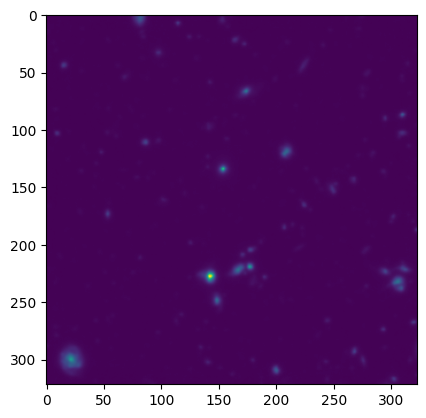

In [7]:
white_light_image = np.sum(datos, axis=0)

plt.imshow(white_light_image)

In [8]:
from astropy.utils.exceptions import AstropyWarning
import warnings
warnings.simplefilter('ignore', category=AstropyWarning)
# Esto lo añadimos pues astropy cambia las coordenadas, y así se ignora ese warning específico

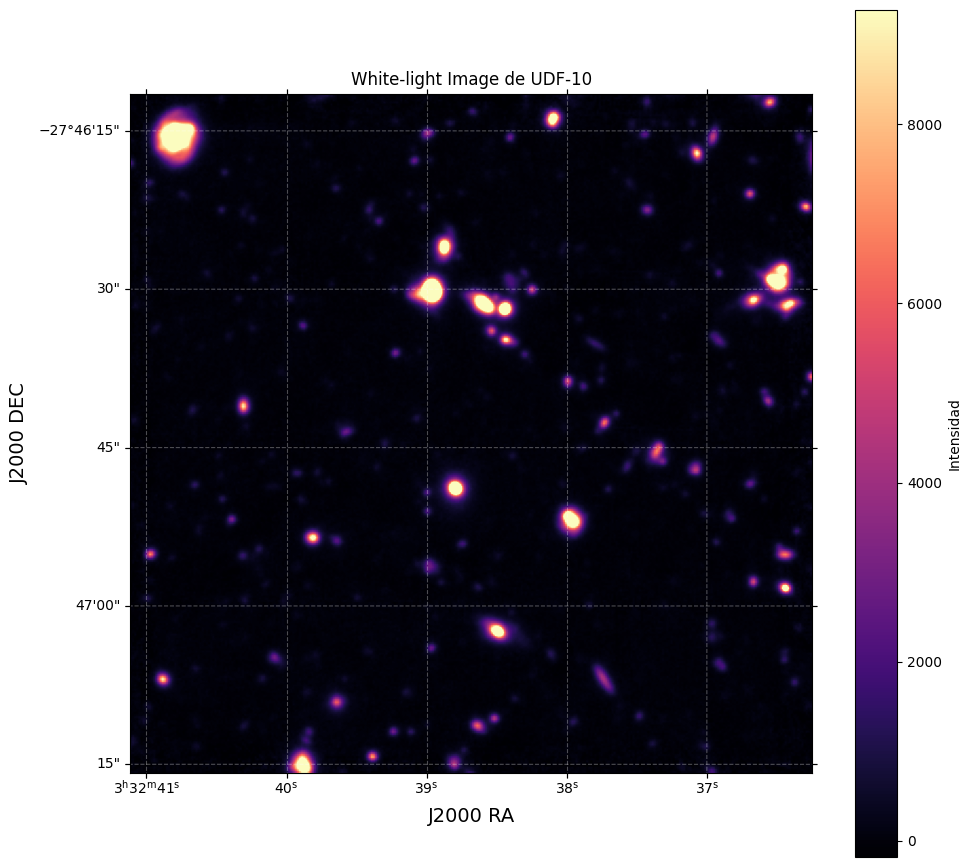

In [9]:
wcs = WCS(cubo[1].header)
wcs = wcs[0,:,:]

val = 0.5
percentiles = np.nanpercentile(white_light_image.flatten(), [val, 100-val])


plt.figure(figsize = (11, 11))

plt.subplot(projection = wcs)
plt.imshow(white_light_image, cmap = 'magma')
plt.clim(percentiles[0], percentiles[1])
plt.colorbar(label = 'Intensidad')


# Labels y título
plt.title('White-light Image de UDF-10')
plt.xlabel('J2000 RA', fontsize = 14)
plt.ylabel('J2000 DEC', fontsize = 14)

plt.grid(color='white', ls='--', alpha = 0.3)
plt.show()


In [10]:
cubo[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  323                                                  
NAXIS2  =                  322                                                  
NAXIS3  =                 3681                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'             

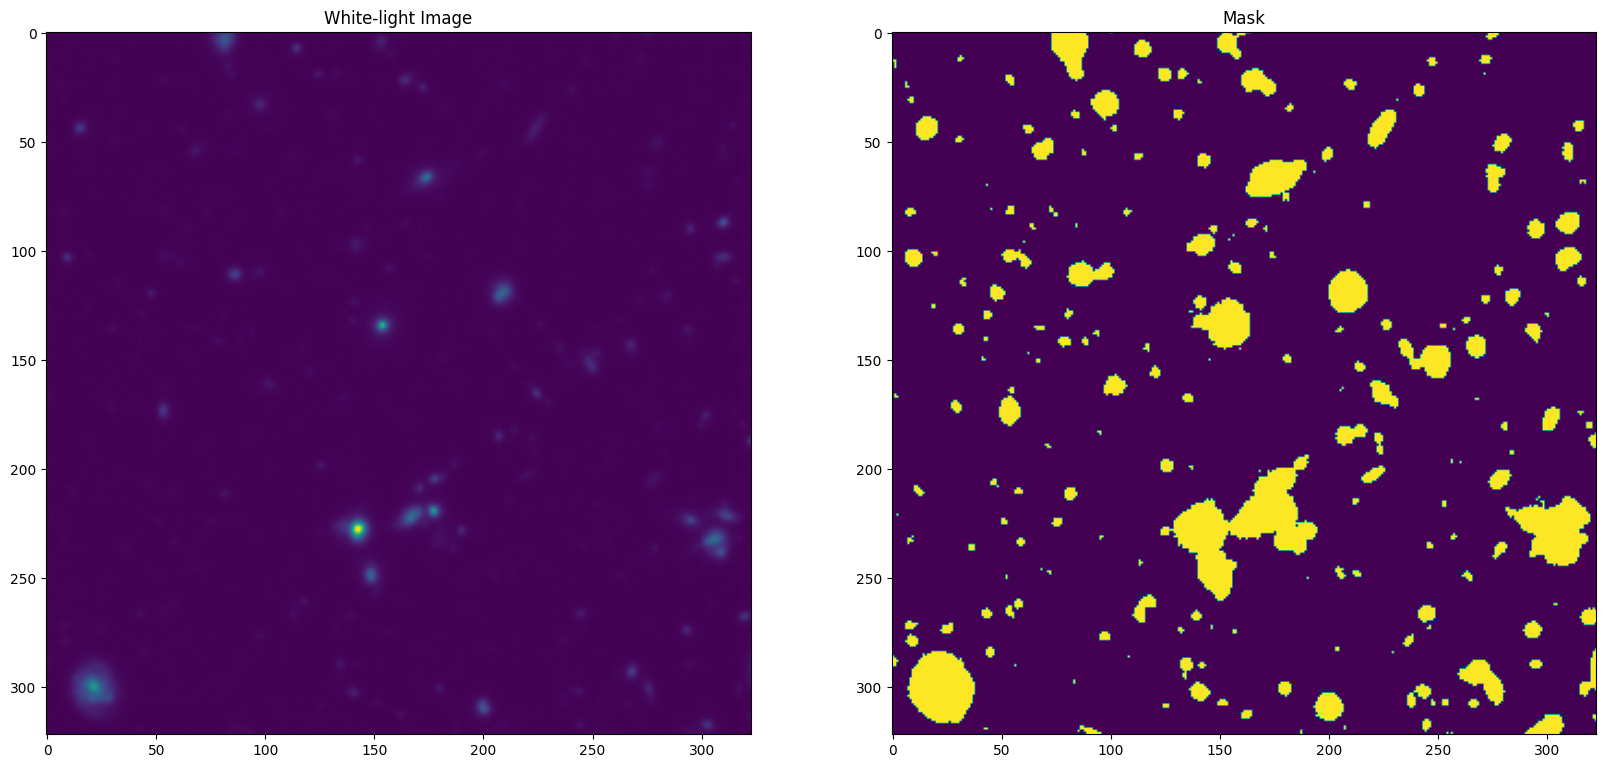

In [11]:
variance = cubo[2].data

sum_var = np.sum(variance, axis = 0)

SNR = white_light_image/np.sqrt(sum_var)

mask = SNR >= 5

fig, axes = plt.subplots(1, 2, figsize = (20, 10))

axes[0].imshow(white_light_image)
axes[0].set_title('White-light Image')

axes[1].imshow(mask)
axes[1].set_title('Mask')

plt.show()


In [12]:
white_masked = white_light_image * mask

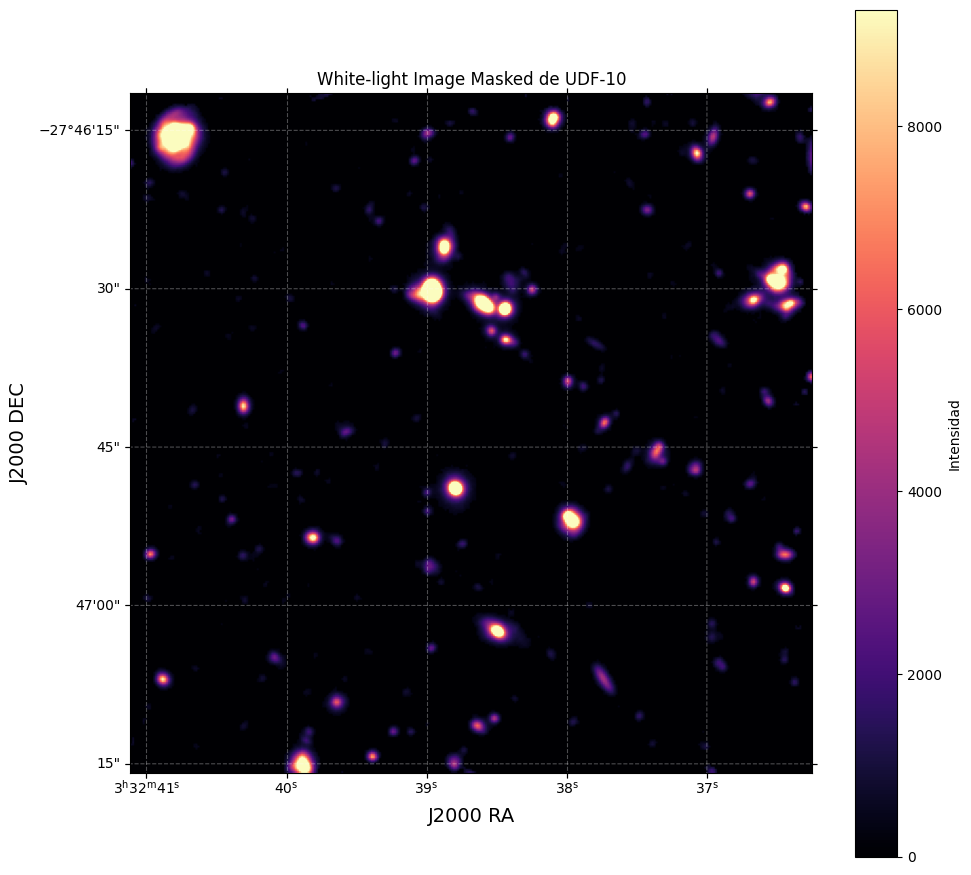

In [13]:
wcs = WCS(cubo[1].header)
wcs = wcs[0,:,:]

val = 0.5
percentiles = np.nanpercentile(white_masked.flatten(), [val, 100-val])


plt.figure(figsize = (11, 11))

plt.subplot(projection = wcs)
plt.imshow(white_masked, cmap = 'magma')
plt.clim(percentiles[0], percentiles[1])
plt.colorbar(label = 'Intensidad')


# Labels y título
plt.title('White-light Image Masked de UDF-10')
plt.xlabel('J2000 RA', fontsize = 14)
plt.ylabel('J2000 DEC', fontsize = 14)

plt.grid(color='white', ls='--', alpha = 0.3)
plt.show()


In [14]:
!pip install opencv-contrib-python

In [15]:
import cv2 #importamos la libreria

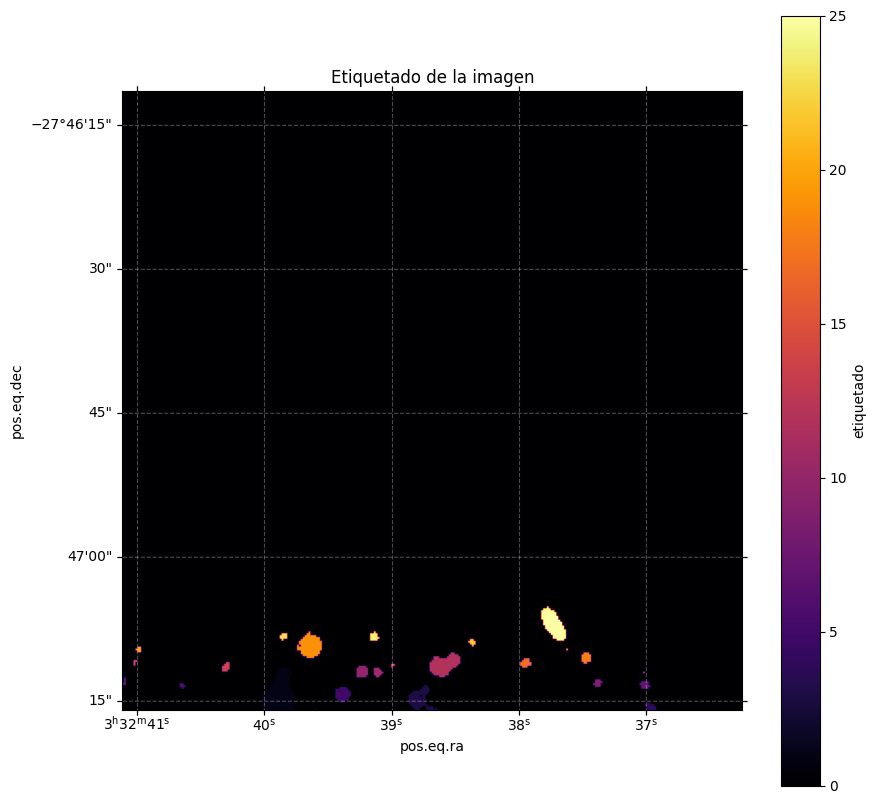

In [16]:
#Convertimos la mascara a uint8
white_masked_uint8 = np.uint8(white_masked)

num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(white_masked_uint8)

plt.figure(figsize = (10,10))
plt.subplot(projection = wcs)
filtered_labels_im = np.where(labels_im < 26, labels_im, 0)
plt.imshow(filtered_labels_im, cmap = 'inferno')
plt.colorbar(label = 'etiquetado')
plt.title('Etiquetado de la imagen')
plt.grid(color='white', ls='--', alpha=0.3)
plt.show()


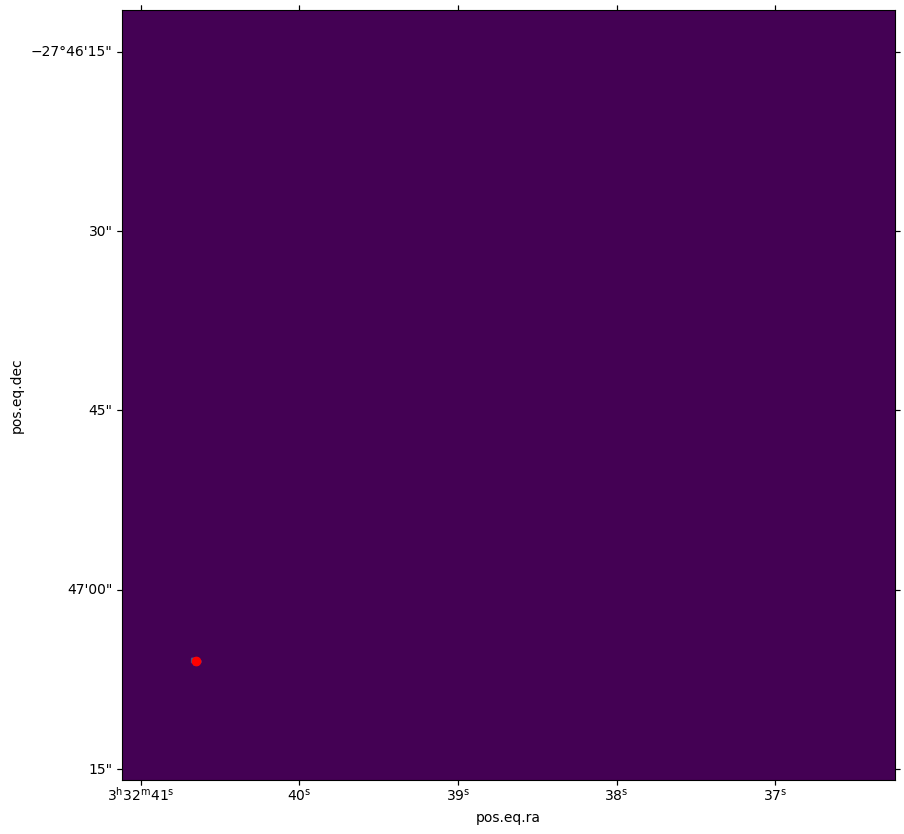

In [17]:
ind_masks = []
ind_centroids = []

for i in range(0, num_labels):
  ind_masks.append(white_masked*(labels_im == i))
  ind_centroids.append(centroids[i])

plt.figure(figsize = (10,10))
plt.subplot(projection = wcs)
plt.imshow(ind_masks[31])
plt.scatter(ind_centroids[31][0], ind_centroids[31][1], color = 'red')

206
[ 267    1  100   17   51    6   18    5   14   33   18  134    1   16
    4    3   22   25  122    7    1   10   12   18  140   90   21   16
    7   51    9   73   35   26    5   10   33  356   78    1    5    1
    9   15    1   14    9    9   87   18   54    6    2   11    4   95
    1    1    1   95   54    5   63    7  164   26   14  282    9   15
   39   43   29   14  396    4   12   14    2    3    9   20   21    9
    7    6   44    6    1   77    4   22    9  244    8    1    1    3
   13    4    1   18   20   72   99    7    2    3  102   17   22    2
   68    4   10    9   93    3   29   20    4    4 1670   31    2    1
    3   50    1   67    9   15   10   29    2  734    8    6    1    8
   16    7    3    6   12    9    8   31    4   17    1    3   10   14
    2    1   71   15   16   51    2   18   17   49   17   22   50    6
    2    3   17    4   24   18   16    4   76  771    1   10    1   37
    8  219   20    1    2   57   32   59  136   13    5    9   16    6
  

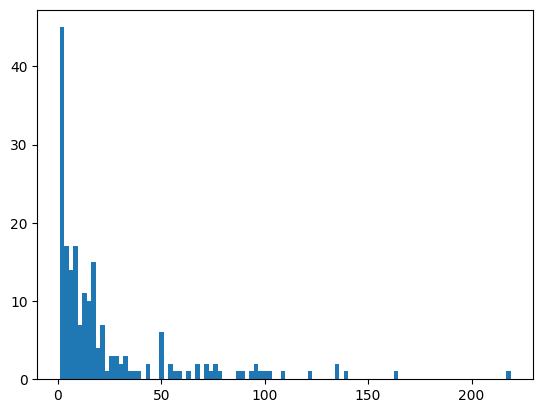

In [18]:
prueba_hist = np.array([np.sum(labels_im == i) for i in range(1, 207)])

print(np.max(labels_im))

print(prueba_hist)

plt.hist(prueba_hist[prueba_hist < 230], bins = 100)

outliers = prueba_hist[prueba_hist > 160]
lista_ind = np.argwhere(prueba_hist > 160)
print(lista_ind)

1390.4058



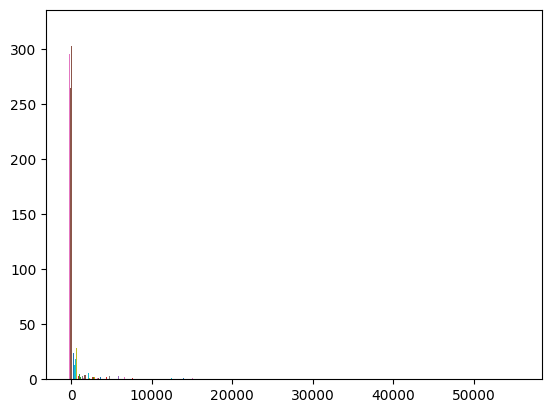

In [19]:
plt.hist(white_light_image, bins = 100)

sigma_calc = np.std(white_light_image)
print(sigma_calc)

print()

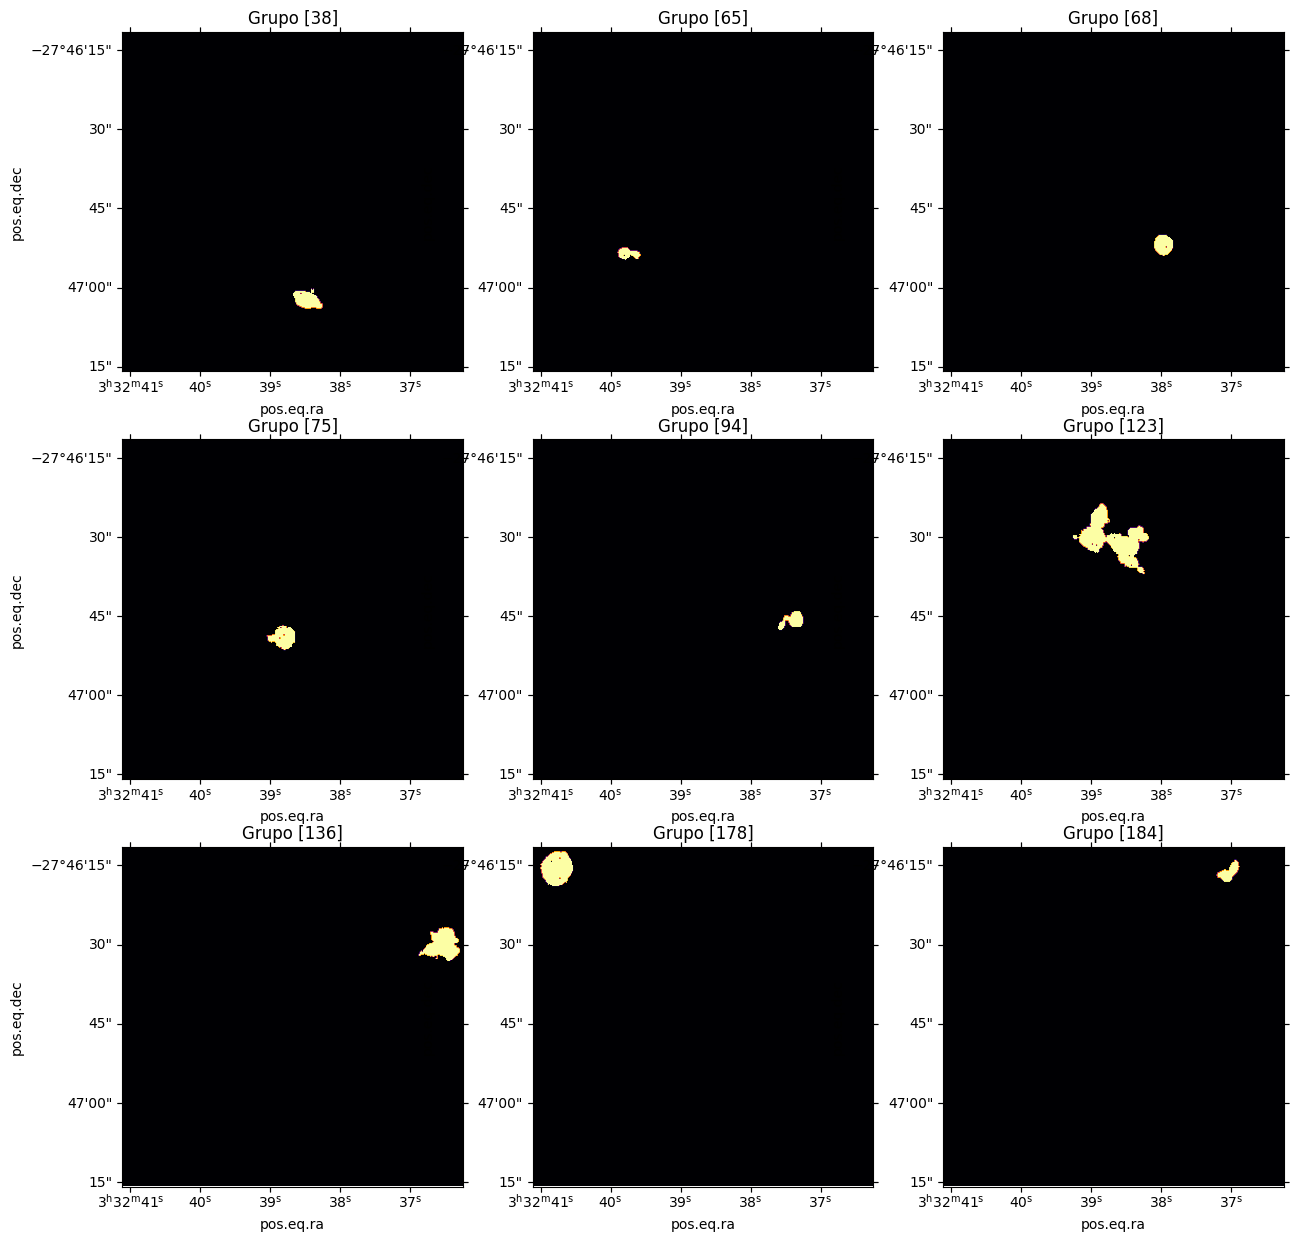

In [24]:
fig = plt.figure(figsize = (15, 15))

for i in range(9):
  indice = lista_ind[i+1] + 1
  grupo = labels_im == indice
  plt.subplot(3, 3, i+1, projection = wcs)
  plt.imshow(grupo, cmap = 'inferno')
  plt.title(f'Grupo {indice}')


In [21]:
# Hacer la transformación manual en plots de pixeles a angstrom
# sacar algun redshift de algunos casos tipo (eliptica, espiral, estrellas)


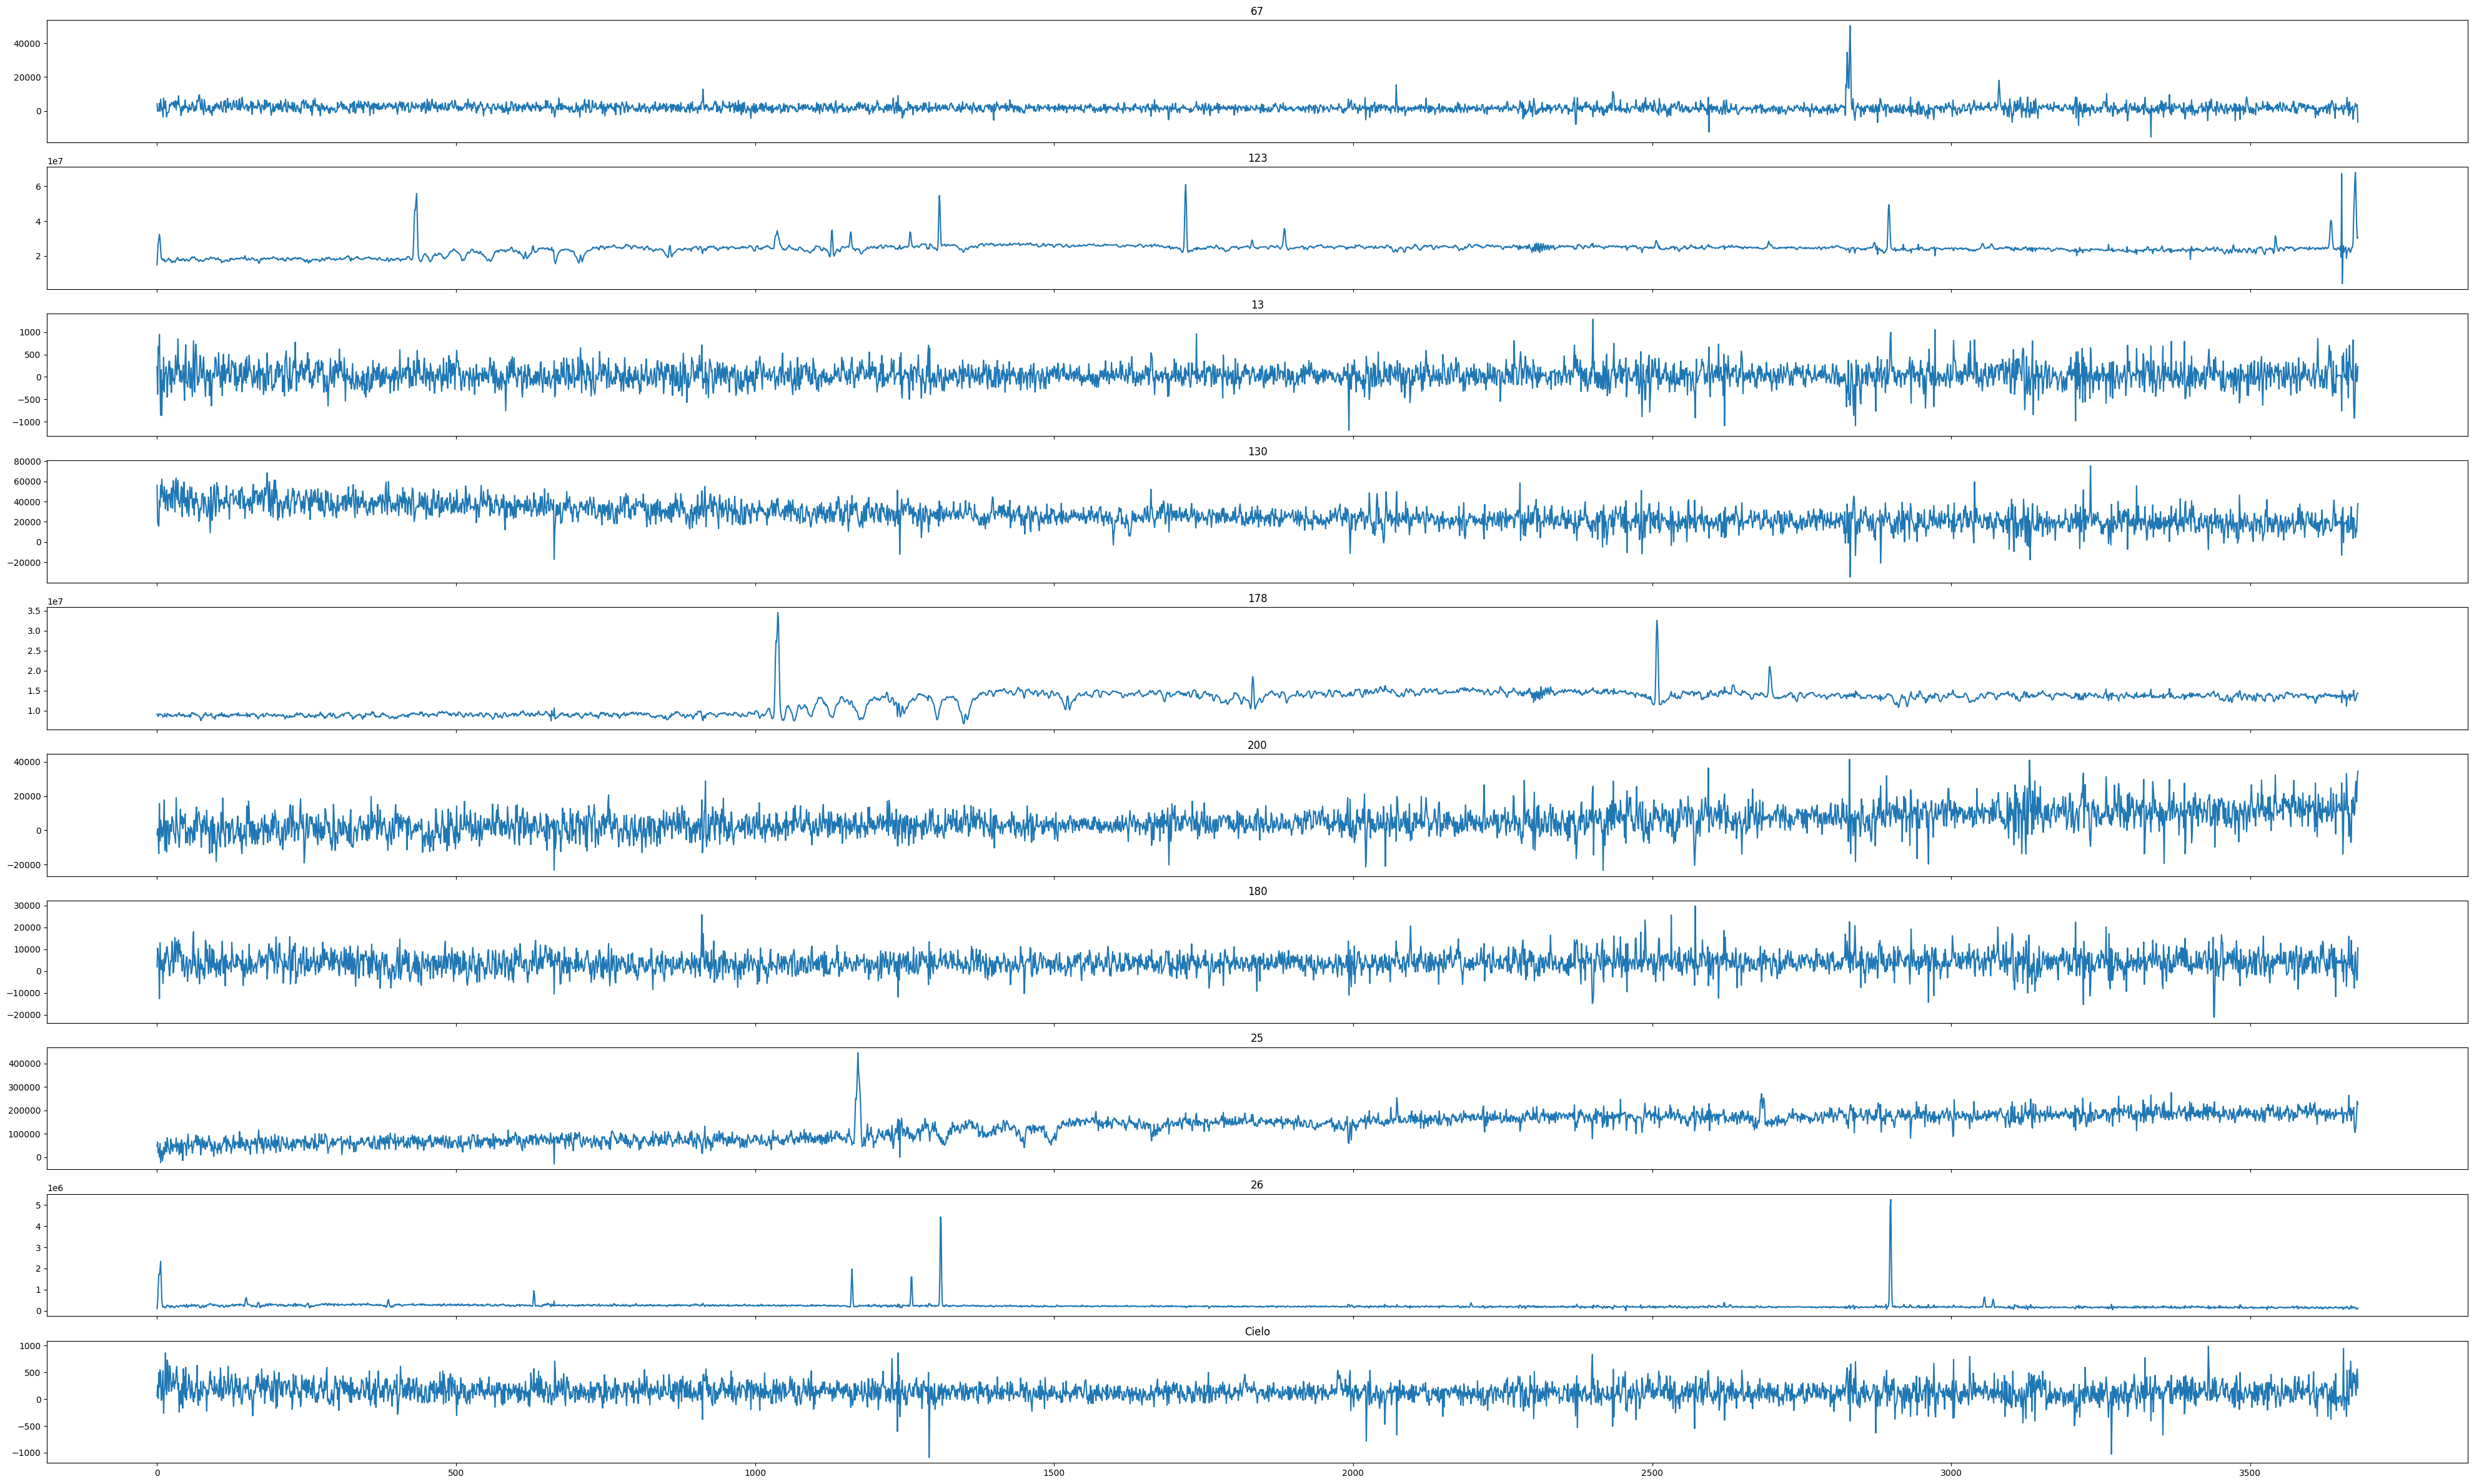

In [25]:
fig, axes = plt.subplots(10, 1, figsize = (50, 30), sharex = True)
def spectrum_i(i):
  return np.sum(ind_masks[i][np.newaxis,:,:]*cubo[1].data, axis=(1,2))

axes[0].plot(spectrum_i(67))
axes[0].set_title('67')

axes[1].plot(spectrum_i(123))
axes[1].set_title('123')

axes[2].plot(spectrum_i(13))
axes[2].set_title('13')

axes[3].plot(spectrum_i(130))
axes[3].set_title('130')

axes[4].plot(spectrum_i(178))
axes[4].set_title('178')

axes[5].plot(spectrum_i(200))
axes[5].set_title('200')

axes[6].plot(spectrum_i(180))
axes[6].set_title('180')

axes[7].plot(spectrum_i(25))
axes[7].set_title('25')

axes[8].plot(spectrum_i(26))
axes[8].set_title('26')

antimascara = np.sum((~mask)[np.newaxis,:,:]*cubo[1].data, axis=(1,2))
axes[9].plot(antimascara)
axes[9].set_title('Cielo')

locs, labels = plt.xticks()
plt.show()

In [27]:
labels

[Text(-500.0, 0, '−500'),
 Text(0.0, 0, '0'),
 Text(500.0, 0, '500'),
 Text(1000.0, 0, '1000'),
 Text(1500.0, 0, '1500'),
 Text(2000.0, 0, '2000'),
 Text(2500.0, 0, '2500'),
 Text(3000.0, 0, '3000'),
 Text(3500.0, 0, '3500'),
 Text(4000.0, 0, '4000')]